In [35]:
import tifffile as tiff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import measure
%matplotlib inline

In [36]:
input1 = 'data/test_gpi1.tif'
input2 = 'data/dapi_cd9.tif'

In [37]:
with tiff.TiffFile(input1) as tif:
    in1_images = tif.asarray()

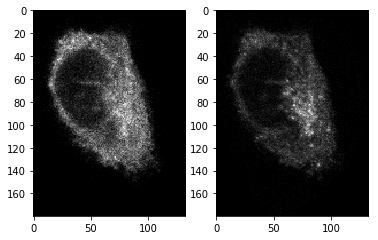

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.imshow(in1_images[0], cmap = plt.cm.gray)
ax2.imshow(in1_images[1], cmap = plt.cm.gray)

In [39]:
#binary masking
from skimage.filters import threshold_otsu

In [40]:
thresh0 = threshold_otsu(in1_images[0])
binary0 = in1_images[0] > thresh0

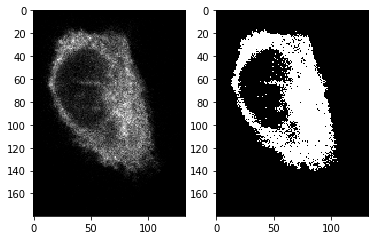

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.imshow(in1_images[0], cmap = plt.cm.gray)
ax2.imshow(binary0, cmap = plt.cm.gray)

In [42]:
from skimage.morphology import convex_hull_image
chull = convex_hull_image(binary0)

In [43]:
binary_contour = measure.find_contours(chull, level=0.1, fully_connected = 'high')

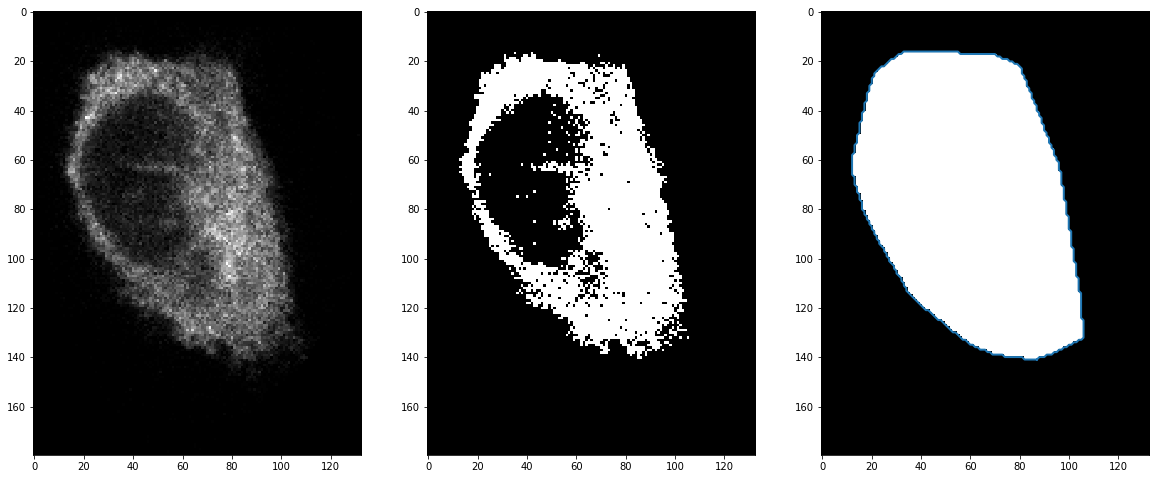

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (20,10))
ax1.imshow(in1_images[0], cmap = plt.cm.gray)
ax2.imshow(binary0, cmap = plt.cm.gray)
ax3.imshow(chull, cmap = plt.cm.gray)
for n, contour in enumerate(binary_contour):
    ax3.plot(contour[:, 1], contour[:, 0], linewidth=2)

In [45]:
sum(chull.flatten())

8442

In [72]:
with tiff.TiffFile(input2) as tif:
    in2_images = tif.asarray().astype(float)

In [73]:
thresh20 = threshold_otsu(in2_images[0])
binary20 = in2_images[0] > thresh20
thresh21 = threshold_otsu(in2_images[1])
binary21 = in2_images[2] > thresh21
chull20 = convex_hull_image(binary20)
chull21 = convex_hull_image(binary21)
binary_contour20 = measure.find_contours(chull20, level=0.1, fully_connected = 'high')
binary_contour21 = measure.find_contours(chull21, level=0.1, fully_connected = 'high')


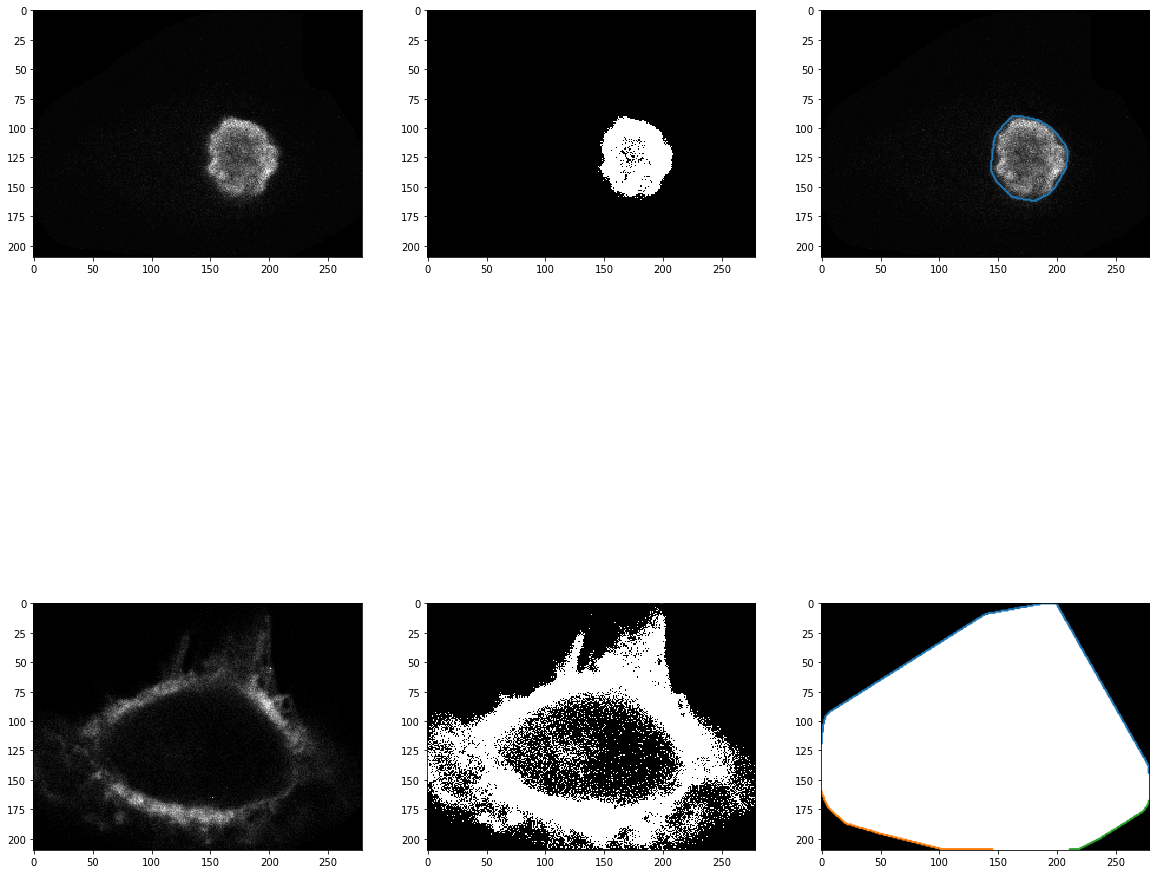

In [48]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize = (20,20))
ax1.imshow(in2_images[0], cmap = plt.cm.gray)
ax2.imshow(binary20, cmap = plt.cm.gray)
ax3.imshow(in2_images[0], cmap = plt.cm.gray)
for n, contour in enumerate(binary_contour20):
    ax3.plot(contour[:, 1], contour[:, 0], linewidth=2)
    
ax4.imshow(in2_images[2], cmap = plt.cm.gray)
ax5.imshow(binary21, cmap = plt.cm.gray)
ax6.imshow(chull21, cmap = plt.cm.gray)
for n, contour in enumerate(binary_contour21):
    ax6.plot(contour[:, 1], contour[:, 0], linewidth=2)

In [74]:
print(sum(chull20.flatten()))
sum(chull21.flatten())

3479


44019

In [65]:
test = chull21.flatten()

In [75]:
in2_images[2][chull21 == False] = np.nan

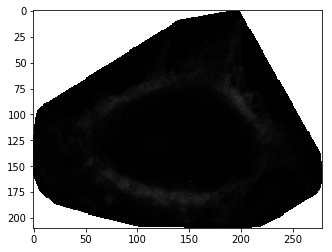

In [61]:
plt.imshow(in2_images[2], cmap = plt.cm.gray)

In [52]:
chan1 = 0
chan2 = 1

In [53]:
for i, data in enumerate([chan1, chan2]):
    print(i, data)

0 0
1 1


In [54]:
type(in1_images)

numpy.ndarray

In [55]:
in1_images[1:2, 3:4].shape

(1, 1, 133)

In [56]:
x = np.array([[[ 0,  1,  2],
            [ 3,  4,  5],
            [ 6,  7,  8],
            [ 9, 10, 11]],
            [[ 10,  11,  12],
            [ 13,  14,  15],
            [ 16,  17,  18],
            [ 19, 110, 111]],
            [[ 20,  21,  22],
            [ 23,  24,  25],
            [ 26,  27,  28],
            [ 29, 210, 211]]])

In [57]:
x[[0,2]].shape

(2, 4, 3)

In [58]:
in1_images.shape

(4, 180, 133)

In [59]:
x.shape

(3, 4, 3)

In [66]:
test

array([False, False, False, ..., False, False, False], dtype=bool)

In [70]:
test_img = in2_images[1].flatten().astype(float)

In [71]:
test_img

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])